In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans

In [2]:
pemsd=np.load('pems-bay/dataset.npy')
pems = np.load('pems-bay/matrix.npy')
print(pems.shape)
unique,count=np.unique(pems,return_counts=True)
data_count=dict(zip(unique,count))
print(data_count)
Matrix = pems
MatrixA = Matrix
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        if i==j:
            MatrixA[i][j]=0
        elif Matrix[i][j]>0:
            MatrixA[i][j]=1
        else:
            MatrixA[i][j]=0

(325, 325)
{0.0: 102931, 0.10002012: 1, 0.10002849: 1, 0.1002047: 1, 0.10059996: 1, 0.100650534: 1, 0.10103861: 1, 0.101114765: 1, 0.101292424: 1, 0.10136019: 1, 0.10158908: 1, 0.10164005: 1, 0.10175049: 1, 0.10224427: 1, 0.102312505: 1, 0.10241496: 1, 0.1024491: 2, 0.10307427: 1, 0.10359885: 1, 0.10385765: 1, 0.10457623: 1, 0.104654424: 1, 0.104767345: 1, 0.104836956: 1, 0.10510685: 1, 0.10525506: 1, 0.105272524: 1, 0.10540347: 1, 0.10542094: 1, 0.10563079: 1, 0.10565699: 1, 0.10569201: 1, 0.1058584: 1, 0.10624457: 1, 0.106270924: 1, 0.10642922: 1, 0.10654369: 1, 0.10659657: 1, 0.10661416: 1, 0.10665824: 1, 0.10694945: 1, 0.10697594: 1, 0.10709971: 1, 0.10754255: 1, 0.10759582: 1, 0.107933454: 1, 0.10794236: 1, 0.10806699: 1, 0.1082809: 1, 0.10856657: 1, 0.10862915: 1, 0.108682826: 1, 0.10901412: 1, 0.10911278: 1, 0.10931033: 1, 0.10954409: 1, 0.10968817: 1, 0.10972419: 1, 0.11015739: 1, 0.11032016: 1, 0.11101861: 1, 0.11139195: 1, 0.111473985: 1, 0.111483134: 1, 0.11257274: 1, 0.1126

In [3]:
def create_diag_matrix(matrix_A):

    #Assign sum of elements across each column to the diagonal of a matrix
    matrix_D = np.diag(np.sum(matrix_A, axis = 1))

    #Return diagonal degree matrix
    return(matrix_D)

def create_norm_laplacian(matrix_D, matrix_A):

    #Determine matrix_L based on the value of determinant of matrix_D (check for singular matrix)
    if np.linalg.det(matrix_D) != 0:
        matrix_D_inv = np.linalg.inv(np.sqrt(matrix_D))
    else:
        matrix_D_inv = np.linalg.pinv(np.sqrt(matrix_D)) # Implicit decomposition of singular vector/matrix to find its inverse

    matrix_L = np.dot(np.dot(matrix_D_inv, matrix_A), matrix_D_inv)

    return(matrix_L)

#Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L
def extract_eigen_values(matrix_L, max_value_nodes):

    #Calculate eigenvalues and eigenvectors of normalized laplacian matrix
    eigen_values, eigen_vectors = scipy.linalg.eigh(matrix_L)

    #Plot distribution of eigenvalues
    plt.figure(figsize = (15, 7))
    plt.scatter(range(1, max_value_nodes + 1), eigen_values)
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvalues')
    plt.title('Eigenvalues Distribution')
    plt.show()

    return(eigen_values, eigen_vectors)

#Execute K-means algorithm, and save it's result on label to visual clusters
def kmeans(Adj_matrix,eigen_values, matrix_L):

    #Determine optimal value for number of clusters, k
    k = np.argmin(np.ediff1d(np.flipud(eigen_values))) + 1

    print('\tOptimal value of k is {0}'.format(k))

    #K-means execution
    kmeans = KMeans(n_clusters = k, random_state = 1234).fit(matrix_L)

    #Store the cluster label(s)
    cluster_labels = kmeans.labels_
    print(cluster_labels)

    #Plot clusters
    plot_graph(Matrix=Adj_matrix, size_of_node=20, k_val=k, num_of_iter=30, cluster_labels=cluster_labels)

#Carry out Spectral Clustering algorithm
def spectral_clustering(X, L, max_value_nodes):

    #Extract eigenvector corresponding to second smallest eigenvalue of matrix L, also known as fiedler vector
    fiedler_vector = X[:, 1]

    #Plot the sparsity pattern and sorted fiedler vector
    fig = plt.figure(figsize = (25, 10), dpi= 300, facecolor = 'w', edgecolor = 'k')

    #Plot normalized laplacian matrix values to determine the sparsity pattern in the clusters
    plt.subplot(1, 2, 1)
    plt.spy(L)
    plt.title('Sparsity Pattern')

    #Plot fiedler vector values to identify possible clusters
    plt.subplot(1, 2, 2)
    plt.scatter(range(1, max_value_nodes + 1), np.sort(fiedler_vector))
    plt.xlabel('Nodes')
    plt.ylabel('Fiedler Vector Values')
    plt.title('Fiedler Vector Distribution')

    plt.show()

#Visualize graph
def plot_graph(Matrix, size_of_node, k_val, num_of_iter, cluster_labels = 'b'):

    #Initilize networkx graph object
    G = nx.Graph()
    nodes=range(len(Matrix))
    G.add_nodes_from(nodes)

    for i in range(len(Matrix)):
        for j in range(len(Matrix)):
            if i==j:
                continue
                #continue
            if Matrix[i][j]>0.9:
                G.add_edge(i, j)

    #Plot networkx graph
    nx.draw(G, node_size = size_of_node, pos = nx.spring_layout(G, k = k_val, iterations = num_of_iter), node_color = cluster_labels, with_labels = False)

    plt.show()




Step 1: Creating the Diagonal Degree Matrix D...

Step 2: Creating the Normalized Laplacian Matrix L...

Step 3: Extracting eigenvalues in ascending order and corresponding eigenvectors...


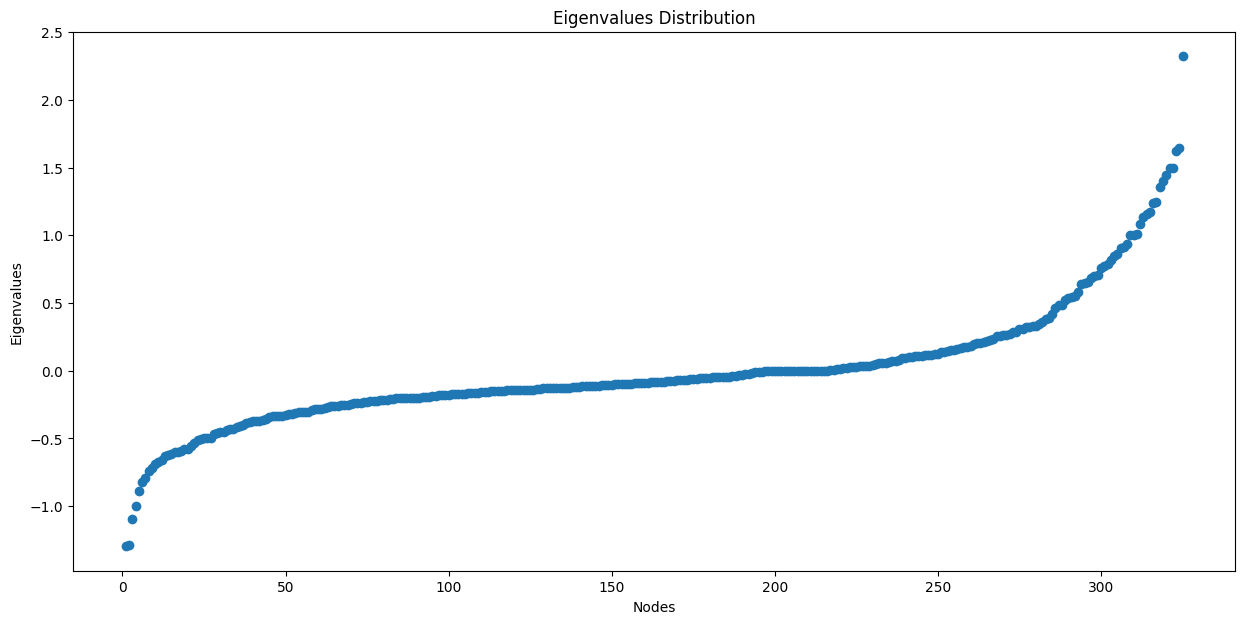


Step 4: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


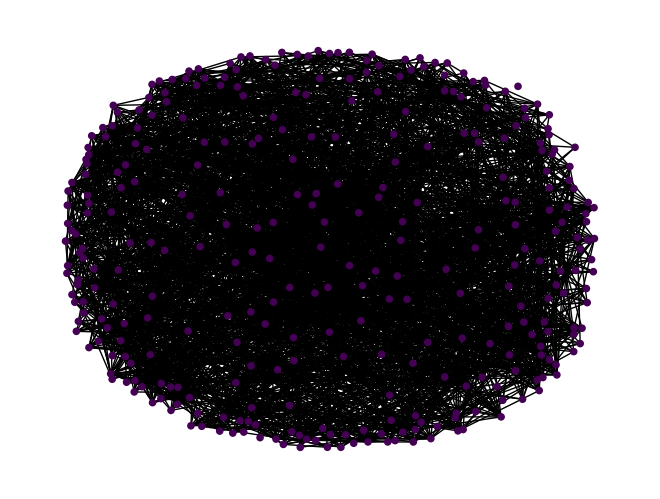

In [4]:
max_value_nodes = 325
matrix_A =MatrixA

print('\nStep 1: Creating the Diagonal Degree Matrix D...')
matrix_D = create_diag_matrix(matrix_A)

print('\nStep 2: Creating the Normalized Laplacian Matrix L...')
matrix_L = create_norm_laplacian(matrix_D, matrix_A)

print('\nStep 3: Extracting eigenvalues in ascending order and corresponding eigenvectors...')
w, X = extract_eigen_values(matrix_L, max_value_nodes)

print('\nStep 4: Calculating k in K-means algorithm and visualizing clusters using generated labels...')
kmeans(MatrixA,w, matrix_L)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Step 5: Creating the Diagonal Degree Matrix D...

Step 6: Creating the Normalized Laplacian Matrix L...

Step 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...


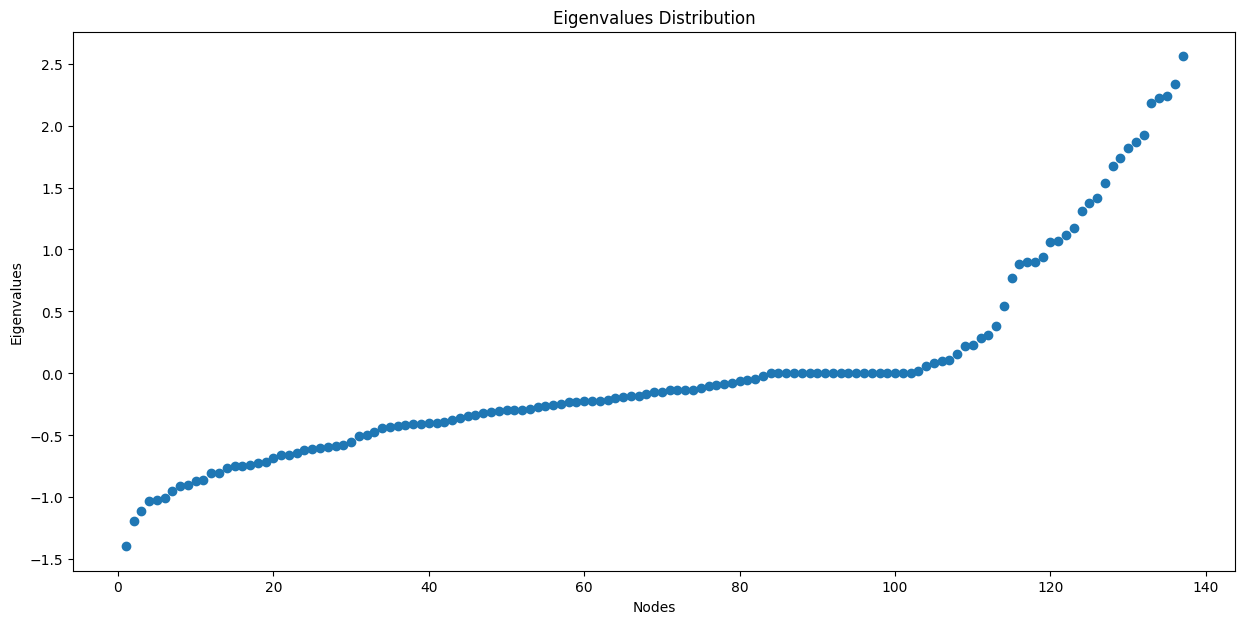


Step 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 5
[4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 3 3 3 3 3 3 4 4 4 4 4 1 1 1 1 1 1 1 1 2 4
 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 4 4 4 2 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4]


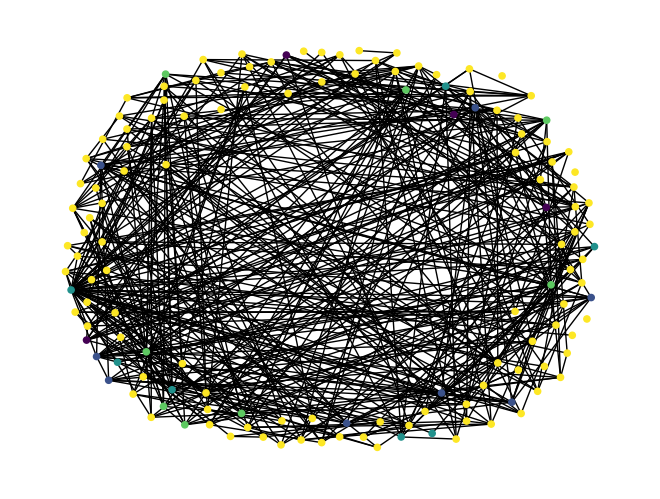

In [6]:
data = np.load('adj_mx_t.npy')

max_value_nodes = 137
matrix = data
matrixA = matrix
print(data)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i==j:
            matrixA[i][j]=0
        elif data[i][j]>0:
            matrixA[i][j]=1
        else:
            matrixA[i][j]=0

matrix_A=matrixA
print('\nStep 5: Creating the Diagonal Degree Matrix D...')
matrix_D = create_diag_matrix(matrix_A)

print('\nStep 6: Creating the Normalized Laplacian Matrix L...')
matrix_L = create_norm_laplacian(matrix_D, matrix_A)

print('\nStep 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...')
w, X = extract_eigen_values(matrix_L, max_value_nodes)

print('\nStep 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...')
kmeans(data,w, matrix_L)
